In [242]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, ElasticNetCV, HuberRegressor, LassoLars, BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

A base de dados a ser utilizada nesse estudo é composta de 80 variáveis no total, sendo 79 delas explicativas. O objetivo desse desafio é descobrir o preço das casas do estado de Minnesota com base em 1000 observações disponíveis. 

O objetivo será, inicialmente, realizar uma feature engineering necessária devido à grande presença de variáveis categóricas na base, o que impediria que realizássemos um modelo de regressão. O objetivo é reduzir, ao máximo, a quantidade de dimensões dessas variáveis, para evitar um número exagerado de variáveis no modelo final.

In [243]:
df = pd.read_csv("C:/Users/User/Downloads/house_prices_insper(1).csv",delimiter=";")

# Engenharia de Features

Vamos começar realizando uma breve análise exploratória de nossa base

In [244]:
ProfileReport(df,minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

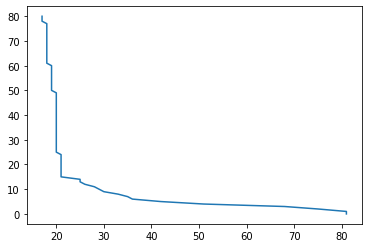

In [245]:
%matplotlib inline
Verificando = Novo_treino.describe()[1:2].transpose()
Coluna = []
Linha = []
for i in range(len(Verificando)):
    Coluna.append(len(Verificando[Verificando['unique'] > (i)]))
    Linha.append(i)

plt.plot(Coluna,Linha)

Logo após isso, foi interessante observar o dicionário de variáveis disponíveis ainda aqui nesse GitHub com o objetivo de classificá-las como Categóricas Nominais, ou Categóricas Ordinais, pois essas iriam exigir transformações para que pudéssemos aplicar o nosso modelo, de fato, um modelo de regressão. As transformações necessárias para cada tipo de variável seriam diferentes.

In [246]:
Cat_Nom = ['MSSubClass','MSZoning',
          'LandContour','Utilities','LotConfig',
          'Neighborhood','Condition1','Condition2','BldgType',
          'HouseStyle','RoofStyle','RoofMatl','Exterior1st',
           'Exterior2nd','MasVnrType','Foundation','Heating',
           'Electrical','Functional','GarageType','MiscFeature',
           'SaleType','SaleCondition']

Cat_Ordin = ['Fence','PoolQC','PavedDrive','GarageCond',
             'GarageQual','GarageFinish','FireplaceQu',
             'KitchenQual','CentralAir','HeatingQC',
             'BsmtFinType1','BsmtFinType2','BsmtExposure',
             'BsmtQual','BsmtCond','ExterQual','ExterCond',
             'OverallQual','OverallCond','Alley','Street',
             'LotShape','LandSlope']

print(f'Variáveis Categórias Nominais = {len(Cat_Nom)}\nVariáveis Categóricas Ordinais = {len(Cat_Ordin)}\n')

Variáveis Categórias Nominais = 23
Variáveis Categóricas Ordinais = 23



Começando pela transformação das variáveis categóricas ordinais, foi importante criar uma função com o objetivo de transformá-las em quantitativas discretas. Ex: Excelente, bom, mediano, ruim, muito ruim --> 5, 4, 3, 2, 1.

In [247]:
def OrdinParaDiscr(Dic,Coluna):
    l = []
    for i in df[Coluna].tolist():
        if i in list(Dic.keys()):
            l.append(Dic[i])
        else:
            l.append(0)
    df[Coluna] = l

OrdinParaDiscr({'Ex':5,'Gd':4,'TA':3,'Fa':2,np.nan:1}, 'PoolQC')
OrdinParaDiscr({'GdPrv':5,'MnPrv':4,'GdWo':3,'MnWw':2,np.nan:1}, 'Fence')
OrdinParaDiscr({'Y':3,'P':2,'N':1}, 'PavedDrive')
OrdinParaDiscr({'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,np.nan:1},'GarageCond')
OrdinParaDiscr({'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,np.nan:1},'GarageQual')
OrdinParaDiscr({'Fin':4,'RFn':3,'Unf':2,np.nan:1},'GarageFinish')
OrdinParaDiscr({'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,np.nan:1},'FireplaceQu')
OrdinParaDiscr({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},'KitchenQual')
OrdinParaDiscr({'Y':1,'N':0},'CentralAir')
OrdinParaDiscr({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},'HeatingQC')
OrdinParaDiscr({'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'Lwq':3,'Unf':2,np.nan:1},'BsmtFinType2')
OrdinParaDiscr({'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'Lwq':3,'Unf':2,np.nan:1},'BsmtFinType1')
OrdinParaDiscr({'Gd':5,'Av':4,'Mn':3,'No':2,np.nan:1},'BsmtExposure')
OrdinParaDiscr({'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,np.nan:1},'BsmtCond')
OrdinParaDiscr({'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,np.nan:1},'BsmtQual')
OrdinParaDiscr({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},'ExterCond')
OrdinParaDiscr({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},'ExterQual')
OrdinParaDiscr({'Gtl':1,'Mod':2,'Sev':3},'LandSlope')
OrdinParaDiscr({'Reg':4,'IR1':3,'IR2':2,'IR3':1},'LotShape')
OrdinParaDiscr({'Grvl':3,'Pave':2,np.nan:3},'Alley')
OrdinParaDiscr({'Grvl':2,'Pave':1},'Street')



## Verificando quais variáveis categóricas nominais poderão ser excluídas do modelo

In [248]:
ProfileReport(df[Cat_Nom],minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

As Variáveis Codition2 e RoofMatl aparentam apresentar quase sempre o mesmo valor, portanto, elas poderão ser descartadas de nosso Dataset.
Além disso, a variável MiscFeature apresenta, quase sempre, valores nulos, portanto poderá ser excluída. As variáveis Utilities e Heatings apresentam quase sempre os mesmos valores, o que indica que também poderão ser excluídas.

In [280]:
df.drop(columns=['Condition2','RoofMatl','MiscFeature','Utilities','Heating'],inplace=True)

O código abaixo foi aplicado com o intuito de verificar quais variáveis categóricas nominais deveriam ter mais prioridade no momento de reduzir a dimensionalidade delas. Optamos por reduzir a dimensionalidade apenas de variáveis com um número de dimensões acima de um determinado valor, levando em consideração o quanto a base aumentaria se tirássemos apenas as variáveis cuja dimensionalidade fosse maior do que ele.

A quantidade de variáveis a mais seria: 174


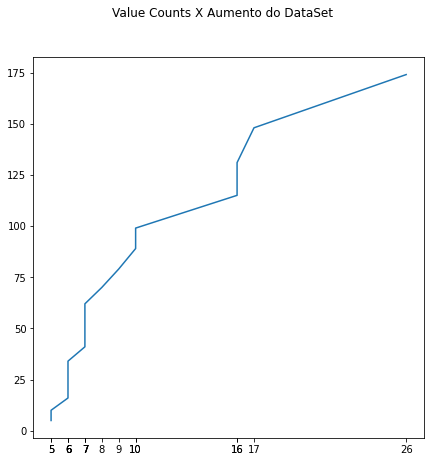

In [249]:
l = []
Cat_Nom = [i for i in Cat_Nom if  i not in ['Condition2','RoofMatl','MiscFeature','Utilities','Heating']]
for i in Cat_Nom:
    l.append(len(df[i].value_counts()))
l.sort()
fig, axs = plt.subplots(1,figsize=(7,7))
fig.suptitle('Value Counts X Aumento do DataSet')
plt.xticks(l)
axs.plot(l,np.cumsum(l))

print(f'A quantidade de variáveis a mais seria: {np.sum(l)}')

Observando o gráfico acima, é possível verificar que, se retirássemos do modelo as variáveis categóricas nominais com mais do que 8 dimensões, ainda assim ficariamos com mais do que 50 variáveis explicativas adicionadas ao modelo, o que não é bom. Sendo assim, escolhemos as variáveis com 7 ou menos dimensões para manter no modelo sem realizar grandes alterações.

In [250]:
l = []
for i in Cat_Nom:
    if len(df[i].value_counts())>=7:
        l.append(i)
print(f'As variáveis que mais necessitam ser editadas serão as: {l}')

ProfileReport(df[l],minimal=True)

As variáveis que mais necessitam ser editadas serão as: ['MSSubClass', 'Neighborhood', 'Condition1', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observando a dados das variáveis acima, foi possível concluir que 8 variáveis poderiam ser facilmente reduzidas sem muitos critérios devido à forte predominância de determinados valores em relação aos outros. Já para outras variáveis, os valores estavam muito bem distribuidos e exigiram uma análise a mais antes de realizar esse procedimento. 

In [251]:
df['SaleCondition'] = [i if i in ['Normal','Partial','Family'] else 'Other' for i in df['SaleCondition']]
df['GarageType'] = [i if i in ['Attchd','BuiltIn','Detchd'] else 'Other' for i in df['GarageType']]
df['SaleType'] = [i if i in ['WD','New','COD'] else 'Other' for i in df['SaleType']]
df['Functional'] = [i if i in ['Typ','Min2','Min1'] else 'Other' for i in df['Functional']]
df['Foundation'] = [i if i in ['PConc','CBlock','BrkTil'] else 'Other' for i in df['Foundation']]
df['Condition1'] = [i if i in ['Norm','Feedr','Artery'] else 'Other' for i in df['Condition1']]
df['HouseStyle'] = [i if i in ['1Story','2Story','1.5Fin','SLvl'] else 'Other' for i in df['HouseStyle']]
df['RoofStyle'] = [i if i in ['Gable','Hip'] else 'Other' for i in df['RoofStyle']]

Foi interessante considerar as menores dimensões menores que, em conjunto, não conseguiriam ultrapassar um total de 100 amostra do DataSet para serem retiradas do modelo. Sendo assim, pudemos chegar à conclusão de quantas dimensões deveriam ser mantidas ou excluídas para cada variável.

In [252]:
na = df['MSSubClass'].value_counts().tolist()
nc = df['Neighborhood'].value_counts().tolist()
n1 = df['Exterior1st'].value_counts().tolist()
n2 = df['Exterior2nd'].value_counts().tolist()
na.sort()
nc.sort()
n1.sort()
n2.sort()
print(f'Devem ser mantidas {len([i for i in np.cumsum(na) if i>100])} dimensões no total para a feature MSSubClass')
print(f'Devem ser mantidas {len([i for i in np.cumsum(nc) if i>100])} dimensões no total para a feature Neighborhood')
print(f'Devem ser mantidas {len([i for i in np.cumsum(n1) if i>100])} dimensões no total para a feature Exterior1st')
print(f'Devem ser mantidas {len([i for i in np.cumsum(n2) if i>100])} dimensões no total para a feature Exterior2nd')

Devem ser mantidas 9 dimensões no total para a feature MSSubClass
Devem ser mantidas 18 dimensões no total para a feature Neighborhood
Devem ser mantidas 7 dimensões no total para a feature Exterior1st
Devem ser mantidas 7 dimensões no total para a feature Exterior2nd


Olhando o array Numpy, queremos manter uma amostra de 100 para cada uma dessas, incluindo as dimensões mais "Fracas" de cada variável que receberão a string "Other". Sendo assim, ficaremos com 9 variáveis para a MSSubCLass, 7 para a Exterior1st, 7 para a Exterior2nd, e 18 para a Neighborhood.

In [253]:
Dimens_MSSC = df['MSSubClass'].value_counts().index.tolist()[:9]
Dimens_N = df['Neighborhood'].value_counts().index.tolist()[:18]
Dimens_E1st = df['Exterior1st'].value_counts().index.tolist()[:7]
Dimens_E2nd = df['Exterior2nd'].value_counts().index.tolist()[:7]

In [254]:
df['MSSubClass'] = [i if i in Dimens_MSSC else 'Other' for i in df['MSSubClass']]
df['Neighborhood'] = [i if i in Dimens_N else 'Other' for i in df['Neighborhood']]
df['Exterior1st'] = [i if i in Dimens_E1st else 'Other' for i in df['Exterior1st']]
df['Exterior2nd'] = [i if i in Dimens_E2nd else 'Other' for i in df['Exterior2nd']]

In [255]:
DimensõesFinais =[]
for i in Cat_Nom:
    DimensõesFinais.append(len(df[i].value_counts()))
DimensõesFinais.sort()
np.cumsum(DimensõesFinais)

array([  3,   7,  11,  15,  19,  23,  27,  32,  37,  42,  48,  54,  60,
        66,  74,  82,  92, 111], dtype=int32)

Acima, é possível ver que, com todas as transformações que foram necessárias para as variáveis categóricas nominais, chegamos a um aumento de 111 - 23 = 88 variáveis no total para o nosso DataSet.

In [256]:
df.drop(columns=['Id'],inplace=True)

Agora vamos transformar todas as variáveis quantitativas contínuas e discretas em numéricas, pois no nosso dataset elas estavam descritas como variáveis categóricas, apesar de apresentarem valores numéricos.

In [261]:
Var_Quant = df.columns.tolist()
Var_Quant = [i for i in Var_Quant if i not in Cat_Nom and i not in Cat_Ordin]
df[Var_Quant] = df[Var_Quant].apply(pd.to_numeric, errors='coerce')

Para que possamos aplicar o nosso modelo, será necessário eliminar todos os valores NaN de nossa base (Claro que sem excluir os valores inexistentes da coluna SalePrice, pois eles apenas são faltantes devido à nossa necessidade de estimá-los.

In [297]:
df.drop(columns='SalePrice').isna().sum().sort_values(ascending=False)

LotFrontage      257
GarageYrBlt       81
Electrical         1
KitchenAbvGr       0
GarageType         0
                ... 
Foundation         0
ExterCond          0
ExterQual          0
MasVnrArea         0
SaleCondition      0
Length: 74, dtype: int64

Observando ao gráfico gerado, foi possível concluir que apenas as colunas MasVnrArea, Electrical, GarageYrBlt e LotFrontage precisariam ser tratadas em nosso modelo. No caso das variáveis MasVnrArea e Electrical, optamos por simplesmente excluir as amostras cujos valores eram NaN, devido à baixa presença dessas variáveis. No caso da GarageYrBlt, devido à sua alta correlação observada com YearBuilt, foi interessante substituir os valores nulos com os valores dessa outra coluna. E no caso da variável LotFrontage, devido à ausência de correlações significativas ou de um método eficaz encontrado para editá-la, optou-se por simplesmente excluí-la!

2 Valores nulos são aceitáveis por enquanto, pois esses valores estão no final do DataSet, onde 2 linhas estão completamente nulas, e serão excluídas do DataSet de teste

In [338]:
pd.set_option('display.max_columns',200)

In [ ]:
df = df[df['MasVnrArea'].notna()]
df = df[df['Electrical'].notna()]
df['GarageYrBlt'].fillna(df['YearBuilt'],inplace=True)
df.drop(columns='LotFrontage',inplace=True)

In [324]:
df

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450.0,1,3,4,Lvl,Inside,1,CollgCr,Norm,1Fam,2Story,7,5,2003.0,2003.0,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,5,4,2,7,706.0,2,0.0,150.0,856.0,5,1,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,4,8.0,Typ,0.0,1,Attchd,2003.0,3,2.0,548.0,4,4,3,0.0,61.0,0.0,0.0,0.0,0.0,1,1,0.0,2.0,2008.0,WD,Normal,208500.0
1,20,RL,9600.0,1,3,4,Lvl,FR2,1,Other,Feedr,1Fam,1Story,6,8,1976.0,1976.0,Gable,MetalSd,MetalSd,None,0.0,3,3,CBlock,5,4,5,6,978.0,2,0.0,284.0,1262.0,5,1,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3,6.0,Typ,1.0,4,Attchd,1976.0,3,2.0,460.0,4,4,3,298.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,5.0,2007.0,WD,Normal,181500.0
2,60,RL,11250.0,1,3,3,Lvl,Inside,1,CollgCr,Norm,1Fam,2Story,7,5,2001.0,2002.0,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,5,4,3,7,486.0,2,0.0,434.0,920.0,5,1,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,4,6.0,Typ,1.0,4,Attchd,2001.0,3,2.0,608.0,4,4,3,0.0,42.0,0.0,0.0,0.0,0.0,1,1,0.0,9.0,2008.0,WD,Normal,223500.0
3,70,RL,9550.0,1,3,3,Lvl,Corner,1,Crawfor,Norm,1Fam,2Story,7,5,1915.0,1970.0,Gable,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,4,5,2,6,216.0,2,0.0,540.0,756.0,4,1,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,4,7.0,Typ,1.0,5,Detchd,1998.0,2,3.0,642.0,4,4,3,0.0,35.0,272.0,0.0,0.0,0.0,1,1,0.0,2.0,2006.0,WD,Other,140000.0
4,60,RL,14260.0,1,3,3,Lvl,FR2,1,NoRidge,Norm,1Fam,2Story,8,5,2000.0,2000.0,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,5,4,4,7,655.0,2,0.0,490.0,1145.0,5,1,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,4,9.0,Typ,1.0,4,Attchd,2000.0,3,3.0,836.0,4,4,3,192.0,84.0,0.0,0.0,0.0,0.0,1,1,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917.0,1,3,4,Lvl,Inside,1,Gilbert,Norm,1Fam,2Story,6,5,1999.0,2000.0,Gable,VinylSd,VinylSd,None,0.0,3,3,PConc,5,4,2,2,0.0,2,0.0,953.0,953.0,5,1,SBrkr,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,3,7.0,Typ,1.0,4,Attchd,1999.0,3,2.0,460.0,4,4,3,0.0,40.0,0.0,0.0,0.0,0.0,1,1,0.0,8.0,2007.0,WD,Normal,NaN
1456,20,RL,13175.0,1,3,4,Lvl,Inside,1,NWAmes,Norm,1Fam,1Story,6,6,1978.0,1988.0,Gable,Plywood,Plywood,Stone,119.0,3,3,CBlock,5,4,2,6,790.0,4,163.0,589.0,1542.0,3,1,SBrkr,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,3,7.0,Min1,2.0,4,Attchd,1978.0,2,2.0,500.0,4,4,3,349.0,0.0,0.0,0.0,0.0,0.0,1,4,0.0,2.0,2010.0,WD,Normal,NaN
1457,70,RL,9042.0,1,3,4,Lvl,Inside,1,Crawfor,Norm,1Fam,2Story,7,9,1941.0,2006.0,Gable,CemntBd,CmentBd,None,0.0,5,4,Other,4,5,2,7,275.0,2,0.0,877.0,1152.0,5,1,SBrkr,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,4,9.0,Typ,2.0,5,Attchd,1941.0,3,1.0,252.0,4,4,3,0.0,60.0,0.0,0.0,0.0,0.0,1,5,2500.0,5.0,2010.0,WD,Normal,NaN
1458,20,RL,9717.0,1,3,4,Lvl,Inside,1,NAmes,Norm,1Fam,1Story,5,6,1950.0,1996.0,Hip,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,4,3,7,49.0,4,1029.0,0.0,1078.0,4,1,FuseA,1078.0,0.0,0.0,1078.0,1.0,0.0,1.0,0.0,2.0,1.0,4,5.0,Typ,0.0,1,Attchd,1950.0,2,1.0,240.0,4,4,3,366.0,0.0,112.0,0.0,0.0,0.0,1,1,0.0,4.0,2010.0,WD,Normal,NaN


Finalmente, vamos obter as dummies para nossas variáveis categóricas nominais, e com isso aumentar o tamanho do nosso DataSet em 88 variáveis como se esperava já no início.

In [343]:
 df = pd.get_dummies(data=df, columns=Cat_Nom)

# Modelagem

Separando nossos DataSets entre o de treino (que será usado para encontrar o melhor modelo de estimação) e o de teste (sobre o qual esse modelo encontrado será aplicado).

In [418]:
df_treino = df[df.index<1000]
df_teste = df[df.index>=1000]

In [420]:
df_treino.reset_index(inplace=True)

Vamos começar realizando um cross-validation para verificar, dentre um total de 19 modelos de regressão, quais apresentariam os maiores R2, e menores MAE, MSE, e MAPE.

In [539]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
X = df_treino.drop(columns=['SalePrice','index'])
y = df_treino['SalePrice']
kf = KFold(n_splits=10)
kf.get_n_splits(X)


models = {
    'LinearReg': LinearRegression(),
    'RidgeReg': Ridge(),
    'LassoReg': Lasso(),
    'ElasticNetReg': ElasticNet(),
    'HuberReg': HuberRegressor(),
    'LassoCV': LassoCV(),
    'ElasticNetCV': ElasticNetCV(),
    'LassoLars': LassoLars(),
    'BayesianRidge': BayesianRidge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'SVM_RBF':SVR(kernel='rbf'),
    'SVM_POLY':SVR(kernel='poly'),
    'SVM_LINEAR':SVR(kernel='linear',max_iter=10**4),
    'SVM_SIG':SVR(kernel='sigmoid'),
    'SGDRegressor':SGDRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor()
}


ListaFinal = []

Não_Categóricas = ['LotArea', 'Street', 'Alley', 'LotShape', 'LandSlope', 'OverallQual',
   'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
   'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
   'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
   'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
   'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
   'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
   'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
   'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
   'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
   'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
   'YrSold']

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = MinMaxScaler().fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

    for model in models.values():
        model.fit(X_train, y_train)
    R2 = []
    MAE = []
    MAPE = []
    MSQE = []
    for name, model in models.items():
        y_pred = model.predict(X_test)
        MAPE.append(mean_absolute_percentage_error(y_test,y_pred))
        MSQE.append(mean_squared_error(y_test,y_pred))
        R2.append(r2_score(y_test,y_pred))
        MAE.append(mean_absolute_error(y_test,y_pred))
        print('-------------------------')
        print(name + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}\n MAPE: {:.4f}".format(r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred)))
        print('-------------------------')
    ListaFinal.append([R2,MAE,MAPE,MSQE])


TRAIN: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344

d:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.099e+10, tolerance: 5.913e+08
  model = cd_fast.enet_coordinate_descent(
d:\python\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\python\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the pre

-------------------------
LinearReg:
 R² : 0.8900
 MSE: 568182740.2800
 MAE: 18224.5400
 MAPE: 0.1255
-------------------------
-------------------------
RidgeReg:
 R² : 0.8905
 MSE: 565441256.9972
 MAE: 17444.6103
 MAPE: 0.1187
-------------------------
-------------------------
LassoReg:
 R² : 0.8903
 MSE: 566648735.6060
 MAE: 18172.8156
 MAPE: 0.1251
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.7104
 MSE: 1496184221.3317
 MAE: 28056.4007
 MAPE: 0.1882
-------------------------
-------------------------
HuberReg:
 R² : 0.9008
 MSE: 512549557.1722
 MAE: 16555.0668
 MAPE: 0.1189
-------------------------
-------------------------
LassoCV:
 R² : 0.8941
 MSE: 547014028.7243
 MAE: 16414.8672
 MAPE: 0.1138
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.0700
 MSE: 4804346251.7224
 MAE: 55199.0779
 MAPE: 0.3855
-------------------------
-------------------------
LassoLars:
 R² : 0.8931
 MSE: 552016165.3782
 MAE: 17864.3304
 MAPE: 0.122

d:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.997e+09, tolerance: 5.792e+08
  model = cd_fast.enet_coordinate_descent(
d:\python\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\python\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the pre

-------------------------
LinearReg:
 R² : -43861808226420670464.0000
 MSE: 279522007508331247856397582336.0000
 MAE: 52869840903741.7031
 MAPE: 224978046.4302
-------------------------
-------------------------
RidgeReg:
 R² : 0.8830
 MSE: 745827129.6216
 MAE: 19071.4984
 MAPE: 0.1047
-------------------------
-------------------------
LassoReg:
 R² : 0.8664
 MSE: 851121860.3235
 MAE: 20085.7030
 MAPE: 0.1165
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.5780
 MSE: 2689409541.6829
 MAE: 31154.9794
 MAPE: 0.1495
-------------------------
-------------------------
HuberReg:
 R² : 0.8716
 MSE: 818007795.0949
 MAE: 17530.6789
 MAPE: 0.0858
-------------------------
-------------------------
LassoCV:
 R² : 0.8958
 MSE: 663761455.6795
 MAE: 17813.1812
 MAPE: 0.0959
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.0527
 MSE: 6037230965.4546
 MAE: 54990.3381
 MAPE: 0.3002
-------------------------
-------------------------
LassoLars:
 R² :

d:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.380e+10, tolerance: 5.979e+08
  model = cd_fast.enet_coordinate_descent(
d:\python\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\python\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the pre

-------------------------
LinearReg:
 R² : 0.8871
 MSE: 516982815.2539
 MAE: 17429.8275
 MAPE: 0.0987
-------------------------
-------------------------
RidgeReg:
 R² : 0.8895
 MSE: 506028669.9793
 MAE: 16847.3413
 MAPE: 0.0953
-------------------------
-------------------------
LassoReg:
 R² : 0.8877
 MSE: 514151652.0233
 MAE: 17382.9912
 MAPE: 0.0984
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.7023
 MSE: 1362559915.5514
 MAE: 26359.9815
 MAPE: 0.1552
-------------------------
-------------------------
HuberReg:
 R² : 0.8781
 MSE: 558144524.9365
 MAE: 17178.8088
 MAPE: 0.0974
-------------------------
-------------------------
LassoCV:
 R² : 0.8994
 MSE: 460644551.1144
 MAE: 16000.1399
 MAPE: 0.0902
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.0837
 MSE: 4194298566.1259
 MAE: 49468.9191
 MAPE: 0.3152
-------------------------
-------------------------
LassoLars:
 R² : 0.8890
 MSE: 507997019.3955
 MAE: 17275.8170
 MAPE: 0.097

d:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.100e+10, tolerance: 5.704e+08
  model = cd_fast.enet_coordinate_descent(
d:\python\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\python\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the pre

-------------------------
LinearReg:
 R² : -9623421184569874432.0000
 MSE: 70150590347418606690782674944.0000
 MAE: 26485956742029.4688
 MAPE: 395312787.0140
-------------------------
-------------------------
RidgeReg:
 R² : 0.9022
 MSE: 712763403.0638
 MAE: 19517.0767
 MAPE: 0.1161
-------------------------
-------------------------
LassoReg:
 R² : 0.8897
 MSE: 803908984.6661
 MAE: 20318.0069
 MAPE: 0.1232
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.6696
 MSE: 2408379024.1795
 MAE: 35946.0493
 MAPE: 0.1993
-------------------------
-------------------------
HuberReg:
 R² : 0.9220
 MSE: 568859287.9112
 MAE: 17844.7231
 MAPE: 0.0977
-------------------------
-------------------------
LassoCV:
 R² : 0.9125
 MSE: 637954048.2120
 MAE: 18795.5129
 MAPE: 0.1132
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.0661
 MSE: 6807403266.5040
 MAE: 63576.9501
 MAPE: 0.3897
-------------------------
-------------------------
LassoLars:
 R² : 0

d:\python\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\python\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.f

-------------------------
LinearReg:
 R² : 0.8964
 MSE: 753332477.1313
 MAE: 19948.1616
 MAPE: 0.1236
-------------------------
-------------------------
RidgeReg:
 R² : 0.8946
 MSE: 766562901.8144
 MAE: 19836.0119
 MAPE: 0.1234
-------------------------
-------------------------
LassoReg:
 R² : 0.8965
 MSE: 752725111.2526
 MAE: 19944.4661
 MAPE: 0.1236
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.6057
 MSE: 2867989174.3668
 MAE: 36066.5883
 MAPE: 0.2316
-------------------------
-------------------------
HuberReg:
 R² : 0.8917
 MSE: 787847417.0676
 MAE: 18910.0752
 MAPE: 0.1226
-------------------------
-------------------------
LassoCV:
 R² : 0.8964
 MSE: 753587643.3097
 MAE: 19884.4895
 MAPE: 0.1248
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.0680
 MSE: 6779509288.0286
 MAE: 59295.1187
 MAPE: 0.4094
-------------------------
-------------------------
LassoLars:
 R² : 0.8970
 MSE: 748977205.7704
 MAE: 19895.4075
 MAPE: 0.123

d:\python\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\python\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.f

-------------------------
LinearReg:
 R² : 0.6281
 MSE: 2302285257.1111
 MAE: 21650.9697
 MAPE: 0.1298
-------------------------
-------------------------
RidgeReg:
 R² : 0.6610
 MSE: 2098381254.5258
 MAE: 20653.3709
 MAPE: 0.1208
-------------------------
-------------------------
LassoReg:
 R² : 0.6286
 MSE: 2299001260.7170
 MAE: 21605.9253
 MAPE: 0.1294
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.6428
 MSE: 2211138342.9920
 MAE: 32814.6148
 MAPE: 0.1858
-------------------------
-------------------------
HuberReg:
 R² : 0.7400
 MSE: 1609499263.0606
 MAE: 18459.8697
 MAPE: 0.0998
-------------------------
-------------------------
LassoCV:
 R² : 0.6464
 MSE: 2189104193.2344
 MAE: 20570.1626
 MAPE: 0.1236
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.0760
 MSE: 5720075776.8191
 MAE: 58177.4331
 MAPE: 0.3604
-------------------------
-------------------------
LassoLars:
 R² : 0.6286
 MSE: 2299189244.8996
 MAE: 21529.2880
 MAPE:

d:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+10, tolerance: 5.451e+08
  model = cd_fast.enet_coordinate_descent(
d:\python\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\python\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the pre

-------------------------
LinearReg:
 R² : 0.8280
 MSE: 1708017748.2323
 MAE: 23561.8687
 MAPE: 0.1299
-------------------------
-------------------------
RidgeReg:
 R² : 0.8307
 MSE: 1681633638.0734
 MAE: 22480.2758
 MAPE: 0.1220
-------------------------
-------------------------
LassoReg:
 R² : 0.8287
 MSE: 1701378059.8313
 MAE: 23482.1221
 MAPE: 0.1294
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.5168
 MSE: 4799605712.2420
 MAE: 39258.4293
 MAPE: 0.2100
-------------------------
-------------------------
HuberReg:
 R² : 0.8264
 MSE: 1723805943.0793
 MAE: 21239.9679
 MAPE: 0.1108
-------------------------
-------------------------
LassoCV:
 R² : 0.8379
 MSE: 1610259598.8821
 MAE: 21299.4851
 MAPE: 0.1132
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.0534
 MSE: 9401765368.2692
 MAE: 66138.8069
 MAPE: 0.3864
-------------------------
-------------------------
LassoLars:
 R² : 0.8313
 MSE: 1675924017.8673
 MAE: 23296.4493
 MAPE:

d:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.090e+10, tolerance: 5.763e+08
  model = cd_fast.enet_coordinate_descent(
d:\python\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\python\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the pre

-------------------------
LinearReg:
 R² : 0.9098
 MSE: 610696941.3232
 MAE: 18737.1616
 MAPE: 0.1152
-------------------------
-------------------------
RidgeReg:
 R² : 0.9143
 MSE: 580712353.8581
 MAE: 18012.2089
 MAPE: 0.1096
-------------------------
-------------------------
LassoReg:
 R² : 0.9097
 MSE: 611682316.9118
 MAE: 18722.9874
 MAPE: 0.1149
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.6569
 MSE: 2324235558.4422
 MAE: 31600.5432
 MAPE: 0.1739
-------------------------
-------------------------
HuberReg:
 R² : 0.9085
 MSE: 619669898.7274
 MAE: 16735.2713
 MAPE: 0.0971
-------------------------
-------------------------
LassoCV:
 R² : 0.9029
 MSE: 657985450.9300
 MAE: 18489.5173
 MAPE: 0.1078
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.0664
 MSE: 6324247060.7217
 MAE: 56868.9269
 MAPE: 0.3362
-------------------------
-------------------------
LassoLars:
 R² : 0.9119
 MSE: 596479088.1717
 MAE: 18453.5741
 MAPE: 0.112

d:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+09, tolerance: 5.949e+08
  model = cd_fast.enet_coordinate_descent(
d:\python\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\python\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the pre

-------------------------
LinearReg:
 R² : -7250982412017414144.0000
 MSE: 35026892354695768384301170688.0000
 MAE: 18809757948567.1875
 MAPE: 103921314.6416
-------------------------
-------------------------
RidgeReg:
 R² : 0.8664
 MSE: 645548302.1597
 MAE: 15948.4321
 MAPE: 0.0966
-------------------------
-------------------------
LassoReg:
 R² : 0.8605
 MSE: 673989088.4238
 MAE: 16578.5860
 MAPE: 0.1001
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.6406
 MSE: 1736240141.0610
 MAE: 25696.9880
 MAPE: 0.1552
-------------------------
-------------------------
HuberReg:
 R² : 0.8716
 MSE: 620353398.5707
 MAE: 14094.0162
 MAPE: 0.0837
-------------------------
-------------------------
LassoCV:
 R² : 0.8641
 MSE: 656488290.0595
 MAE: 15037.3108
 MAPE: 0.0915
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.0516
 MSE: 4581565947.5313
 MAE: 47800.3076
 MAPE: 0.3083
-------------------------
-------------------------
LassoLars:
 R² : 0

d:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+09, tolerance: 5.843e+08
  model = cd_fast.enet_coordinate_descent(
d:\python\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\python\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the pre

-------------------------
LinearReg:
 R² : 0.8704
 MSE: 776679260.6970
 MAE: 18754.6970
 MAPE: 0.1257
-------------------------
-------------------------
RidgeReg:
 R² : 0.8747
 MSE: 750509451.3277
 MAE: 18216.5631
 MAPE: 0.1202
-------------------------
-------------------------
LassoReg:
 R² : 0.8711
 MSE: 772308178.6009
 MAE: 18686.1272
 MAPE: 0.1253
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.6360
 MSE: 2180852343.7316
 MAE: 29947.8442
 MAPE: 0.2008
-------------------------
-------------------------
HuberReg:
 R² : 0.8775
 MSE: 734077527.6954
 MAE: 16115.1192
 MAPE: 0.1007
-------------------------
-------------------------
LassoCV:
 R² : 0.8807
 MSE: 714481788.7853
 MAE: 17391.2658
 MAPE: 0.1132
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.0704
 MSE: 5569405691.5942
 MAE: 51843.1736
 MAPE: 0.3681
-------------------------
-------------------------
LassoLars:
 R² : 0.8764
 MSE: 740308858.3790
 MAE: 18143.4093
 MAPE: 0.121

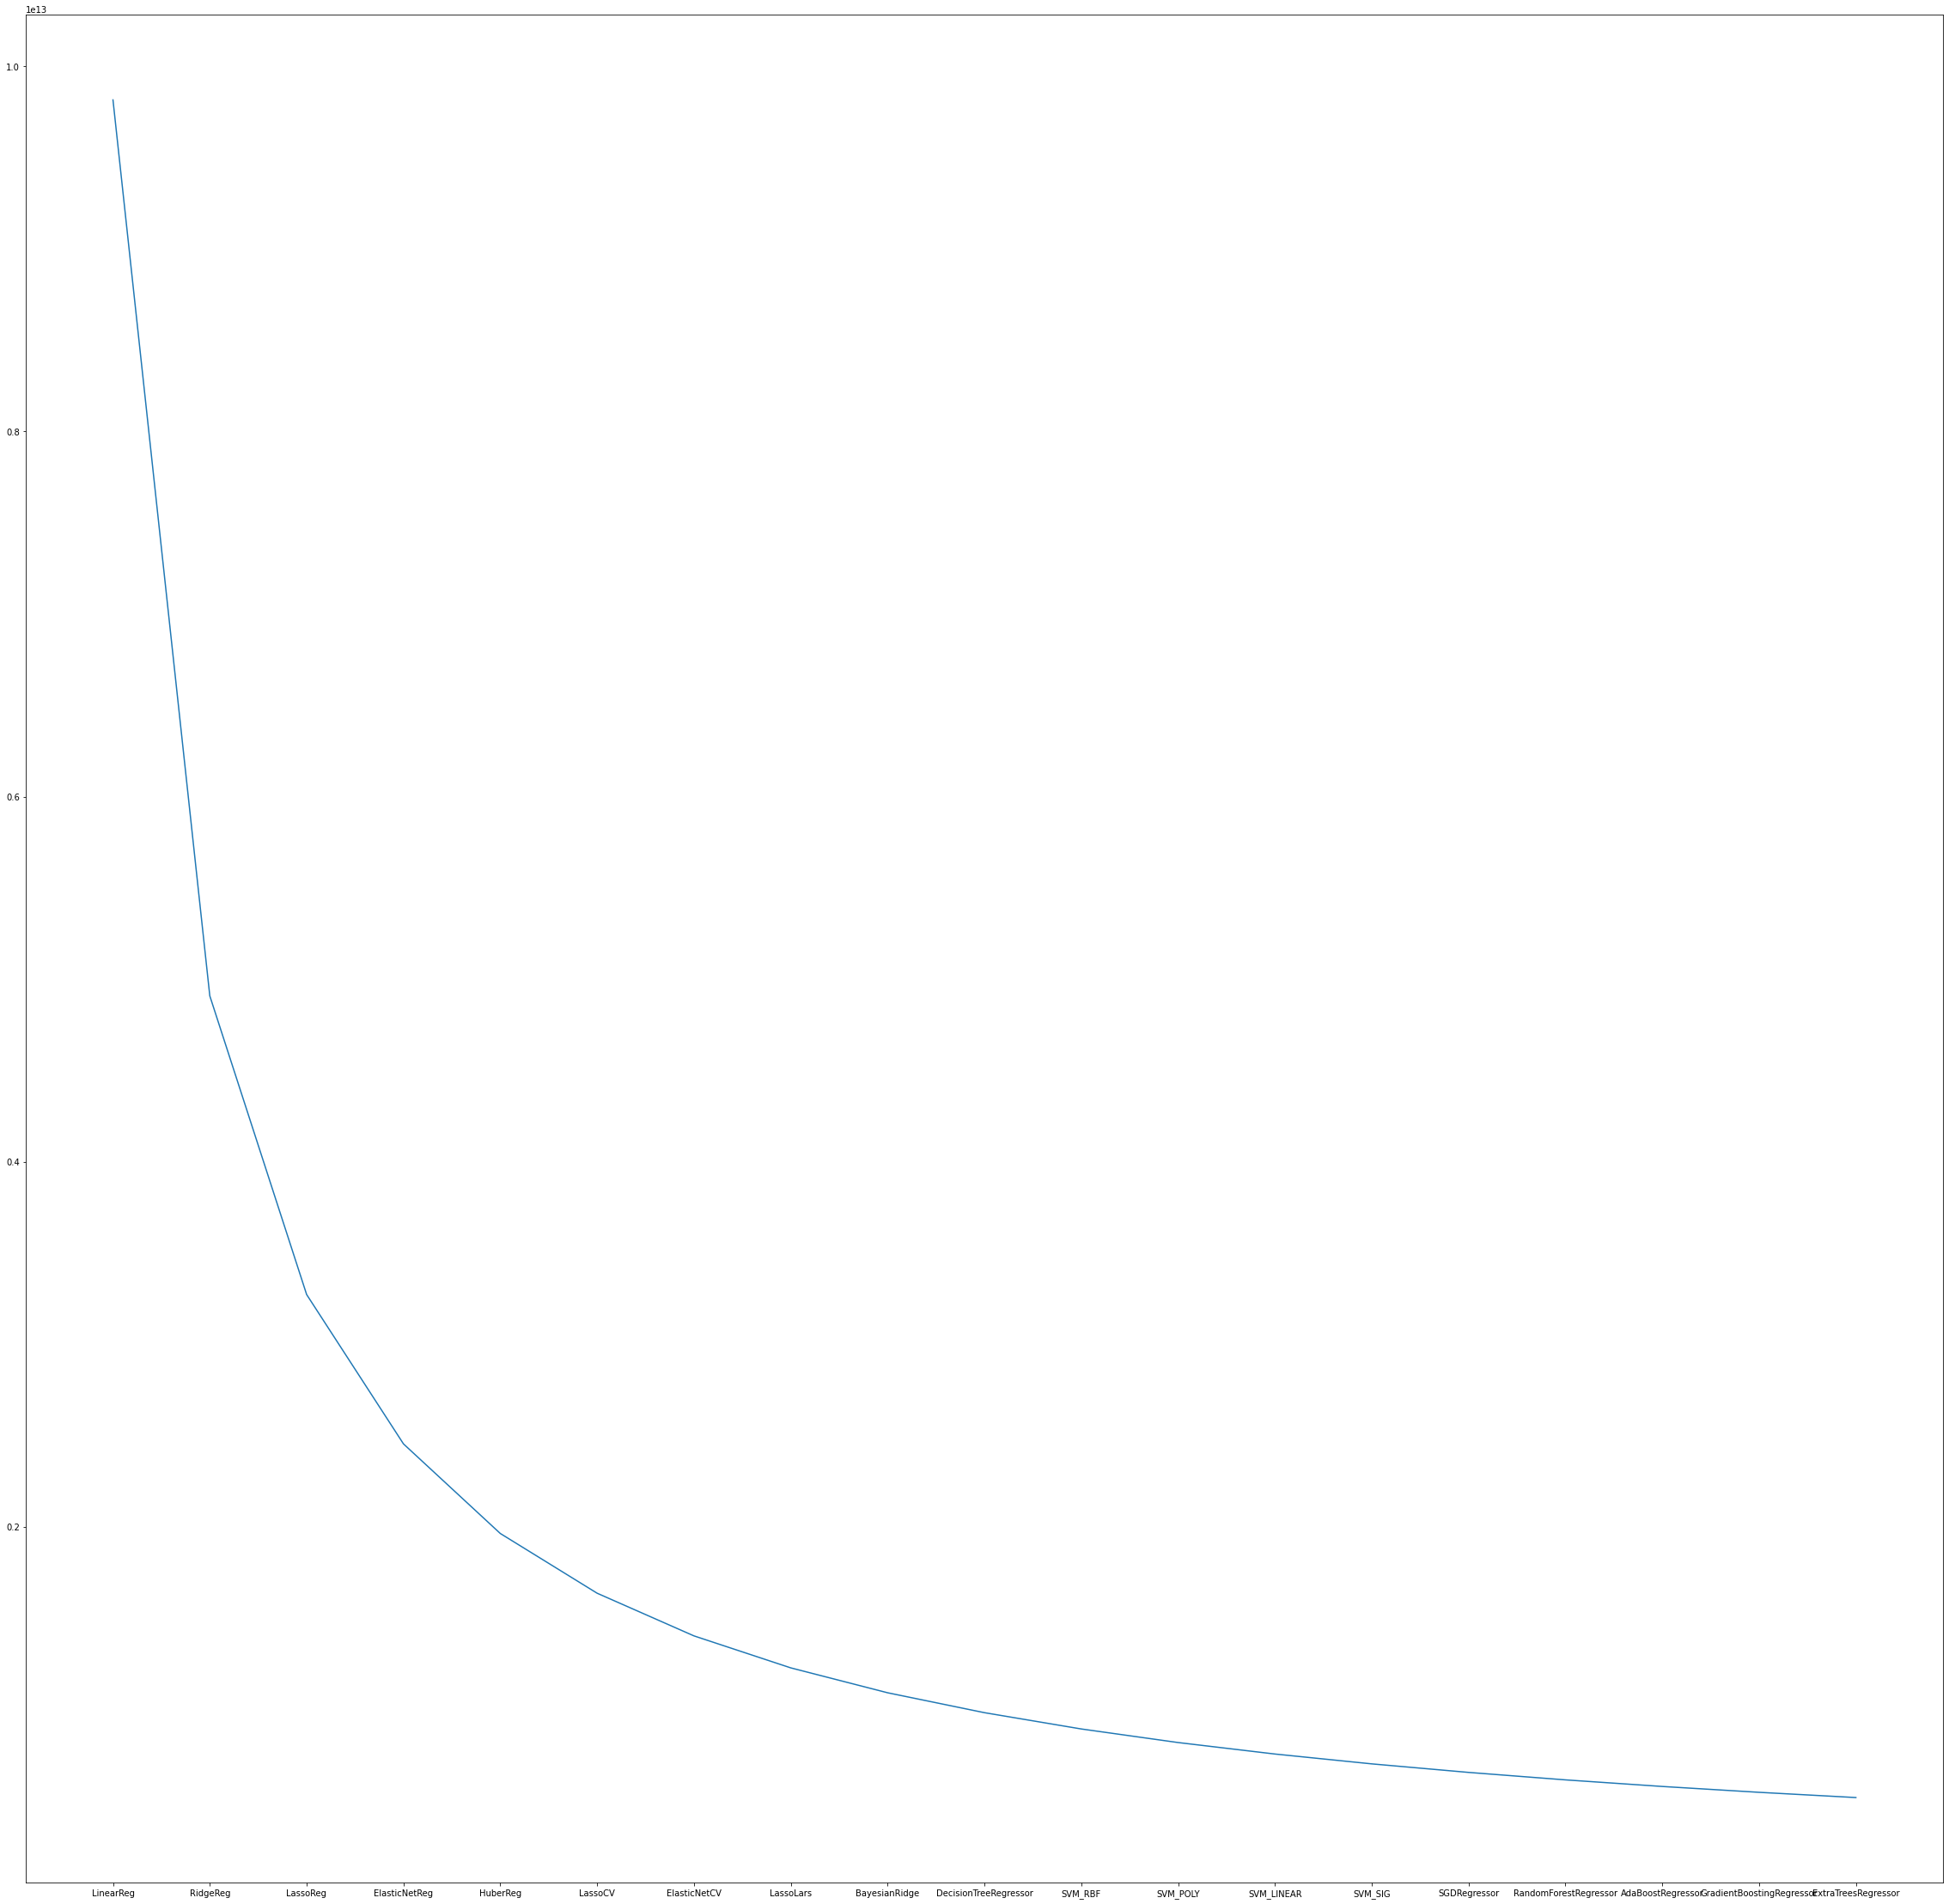

In [540]:
Métrica = [] 
PorModelo = []
for j in range(19):
    for i in range(10):
        Métrica.append([ListaFinal[i][1][j]])
    PorModelo.append(np.mean(Métrica))
fig, axs = plt.subplots(1,figsize=(40,40))

axs.plot(list(models.keys()),PorModelo)

O gráfico gerado torna evidente que os modelos de Gradient Boosting e ExtraTreesRegressor seriam os que apresentariam os menores erros médios absolutos, portanto eles deveriam ser priorizados na hora de realizar um modelo de fato(esse gráfico também foi observado para o MSE, MAPE, e R2 e os resultados foram os mesmos). Apesar de o modelo de Extra Trees apresentar uma performance levemente melhor, optamos pelo Gradient Boosting por já ser mais comum. Sendo assim, realizamos, para esse modelo, o tunning de hiperparâmetros para verificar quais hiperparâmetros dele iriam nos proporcionar uma maior eficácia na estimação.

In [541]:
from sklearn.model_selection import GridSearchCV
Grid = {
    'n_estimators':[100,200,300,400,500],
    'criterion':['friedman_mse','squared_error','mse','mae'],
    'max_depth':[3,5,8,10,15]
}

In [542]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

scaler = MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

Nana = GridSearchCV(GradientBoostingRegressor(),param_grid=Grid,cv=3,n_jobs = -1, verbose = 2).fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\python\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remov

d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

In [543]:
Nana.best_estimator_

GradientBoostingRegressor(criterion='mse', n_estimators=200)

Observando a saída acima, foi possível concluir quais seriam os melhores hiperparâmetros a serem aplicados em nosso futuro modelo de previsão.

In [544]:
X_train = df_treino.drop(columns=['SalePrice','index'])
X_test = df_teste.drop(columns='SalePrice')
y_train = df_treino['SalePrice']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train),columns= X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

from sklearn.ensemble import GradientBoostingRegressor

Predictor = GradientBoostingRegressor(criterion='mse', n_estimators=200).fit(X_train,y_train)
Results = Predictor.predict(X_test)

print(Results)

d:\python\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remov

d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

[ 73632.52167816  77438.72229298 249058.85427955 138069.85319292
 182664.4475139  138058.80734671 161588.68348747 102509.86671657
 220925.36040751 113507.37026433 125300.08004234 109389.78386387
 165820.35935415  86846.22995883 136653.84134605 209624.24508536
 214730.12386223 215069.63841932 174501.07134536 199042.09769694
 154382.63219045 194680.8955143  112380.60246112 184343.44667189
 352364.11527367 116371.26794551 145212.53404984 310118.87748773
 121995.79744443 115375.31929798 138217.19045497 263244.0138551
 327633.6173135  243469.95421841 120187.12495734  70375.94425015
 304656.74648424 272479.86662628  96585.18205008  87411.82709828
 153636.20590096 164099.8464194  176944.83516955 265896.92527221
 332225.37105206 137694.30729037 397772.11564808 140117.84358546
 145310.68973275 100467.92384231 184550.78671852 187762.32067967
 176069.11616999 144293.12811068 279159.28885576 167876.08761765
 197822.81982933 229997.27630451 352858.18466395 190932.45280193
 199484.4257037   83605.32

d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
d:\python\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be remo

In [546]:
Results

array([ 73632.52167816,  77438.72229298, 249058.85427955, 138069.85319292,
       182664.4475139 , 138058.80734671, 161588.68348747, 102509.86671657,
       220925.36040751, 113507.37026433, 125300.08004234, 109389.78386387,
       165820.35935415,  86846.22995883, 136653.84134605, 209624.24508536,
       214730.12386223, 215069.63841932, 174501.07134536, 199042.09769694,
       154382.63219045, 194680.8955143 , 112380.60246112, 184343.44667189,
       352364.11527367, 116371.26794551, 145212.53404984, 310118.87748773,
       121995.79744443, 115375.31929798, 138217.19045497, 263244.0138551 ,
       327633.6173135 , 243469.95421841, 120187.12495734,  70375.94425015,
       304656.74648424, 272479.86662628,  96585.18205008,  87411.82709828,
       153636.20590096, 164099.8464194 , 176944.83516955, 265896.92527221,
       332225.37105206, 137694.30729037, 397772.11564808, 140117.84358546,
       145310.68973275, 100467.92384231, 184550.78671852, 187762.32067967,
       176069.11616999, 1

Como os avisos acabaram bloqueando o array previsto que deveria ser preenchido na base de dados, disponibilizamos ele para a visualização acima.